In [1]:
%matplotlib inline

In [2]:
run rotatingAntennaWedge_1days_217ant_diffDirection_small_jit.py

0.048252
day=0


rotatingAntennaWedge_1days_217ant_diffDirection_small_jit.py:221: RuntimeWarning: invalid value encountered in divide
  uvCubeDelayTransform=fft.fftshift(fft.fft(fft.fftshift(uvCube/sampleCube*windowCube,axes=[2]),axis=2),axes=[2])
rotatingAntennaWedge_1days_217ant_diffDirection_small_jit.py:137: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  counts[binNum]+=1
rotatingAntennaWedge_1days_217ant_diffDirection_small_jit.py:138: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  dGrid[:,binNum]+=dataCube[uNum,vNum,dataCube.shape[-1]/2:]
rotatingAntennaWedge_1days_217ant_diffDirection_small_jit.py:139: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  dGrid[:,binNum]+=np.flipud(dataCube[uNum,vNum,:dataCube.shape[-1]/2])
rotatingAntennaWedge_1days_217ant_diffDirection_small_jit.py:238: RuntimeWa

/Users/aaronew/Python/analysis/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in divide


(0, 0.2)

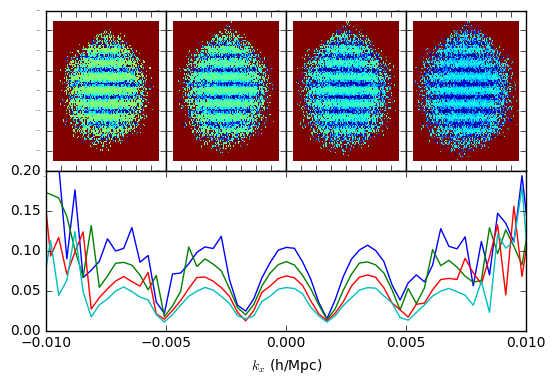

In [6]:
nf=len(fAxis)
uA=np.arange(-gridSize/2,gridSize/2)*dGrid
kA=cosmology.u2kperp(uA,cosmology.f2z(f0))
kxGrid,kyGrid=np.meshgrid(kA,kA)
plt.close()
fig=plt.figure()
axarr=[fig.add_axes([.1,.5,.2,.4]),
        fig.add_axes([.3,.5,.2,.4]),
        fig.add_axes([.5,.5,.2,.4]),
        fig.add_axes([.7,.5,.2,.4])]
laxis=fig.add_axes([.1,.1,.8,.4])



for sliceNum in range(4):
    sliceIndex=(sliceNum*nf)/4
    testSliceL=np.log10(np.abs(np.real(uvCube[:,:,sliceIndex+2]/sampleCube[:,:,sliceIndex+2])))
    testSliceL[np.logical_or(np.isnan(testSliceL),np.isinf(testSliceL))]=0.
    axarr[sliceNum].pcolor(kxGrid,kyGrid,testSliceL,vmin=-2,vmax=0)
    axarr[sliceNum].tick_params('x',labelsize=0)
    axarr[sliceNum].tick_params('y',labelsize=0)


    avgBox=(np.mean(10**testSliceL[:,np.logical_and(kA>-.005,kA<=.005)],axis=1))
    laxis.plot(kA,avgBox)
laxis.set_xlim(-0.01,0.01)
laxis.set_xlabel('$k_x$ (h/Mpc)')
laxis.set_ylim(0,.2)
